In [2]:
from diffusers import ControlNetModel, StableDiffusionXLControlNetPipeline, AutoencoderKL
from diffusers.utils import load_image
from PIL import Image
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
#!pip install controlnet_aux==0.0.7

In [9]:
import torch
import os
from huggingface_hub import HfApi
from pathlib import Path
from diffusers.utils import load_image
from PIL import Image
import numpy as np
from controlnet_aux import PidiNetDetector, HEDdetector

from diffusers import (
    ControlNetModel,
    StableDiffusionControlNetPipeline,
    UniPCMultistepScheduler,
)

checkpoint = "lllyasviel/control_v11p_sd15_softedge"


processor = HEDdetector.from_pretrained('lllyasviel/Annotators')
processor = PidiNetDetector.from_pretrained('lllyasviel/Annotators')

controlnet = ControlNetModel.from_pretrained(checkpoint, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

generator = torch.manual_seed(0)



config.json: 100%|██████████| 999/999 [00:00<00:00, 1.17MB/s]
diffusion_pytorch_model.safetensors: 100%|██████████| 1.45G/1.45G [00:12<00:00, 113MB/s] 
tokenizer/special_tokens_map.json: 100%|██████████| 472/472 [00:00<00:00, 353kB/s]

text_encoder/config.json: 100%|██████████| 617/617 [00:00<00:00, 126kB/s]

safety_checker/config.json: 100%|██████████| 4.72k/4.72k [00:00<00:00, 5.98MB/s]






tokenizer/tokenizer_config.json: 100%|██████████| 806/806 [00:00<00:00, 827kB/s]







unet/config.json: 100%|██████████| 743/743 [00:00<00:00, 2.30MB/s]





scheduler/scheduler_config.json: 100%|██████████| 308/308 [00:00<00:00, 1.13MB/s]
tokenizer/vocab.json: 100%|██████████| 1.06M/1.06M [00:00<00:00, 16.2MB/s]



Fetching 15 files:   7%|▋         | 1/15 [00:00<00:08,  1.71it/s]




tokenizer/merges.txt: 100%|██████████| 525k/525k [00:00<00:00, 1.85MB/s]



vae/config.json: 100%|██████████| 547/547 [00:00<00:00, 1.15MB/s]








































































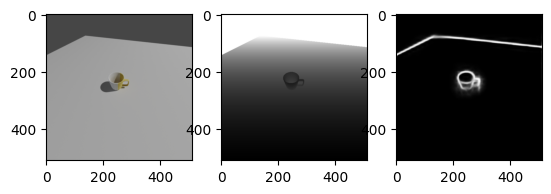

In [22]:

from dsd import DATA_DIR


render_path = DATA_DIR / "renders/mugs/close"
rgb_image = Image.open(render_path / "rgb.png")
rgb_image = load_image(rgb_image)
depth_image = load_image(Image.open(render_path / "depth_image.png"))

control_image = processor(depth_image)
# show original image, depth image and cannied depth image
plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.subplot(1, 3, 2)
plt.imshow(depth_image)
plt.subplot(1, 3, 3)
plt.imshow(control_image)





In [23]:
prompt = "blue mug"

images = pipe(prompt, num_inference_steps=50, generator=generator, image=control_image, num_images_per_prompt=4).images


100%|██████████| 50/50 [00:11<00:00,  4.46it/s]


Text(0.5, 1.0, 'Prompted 4')

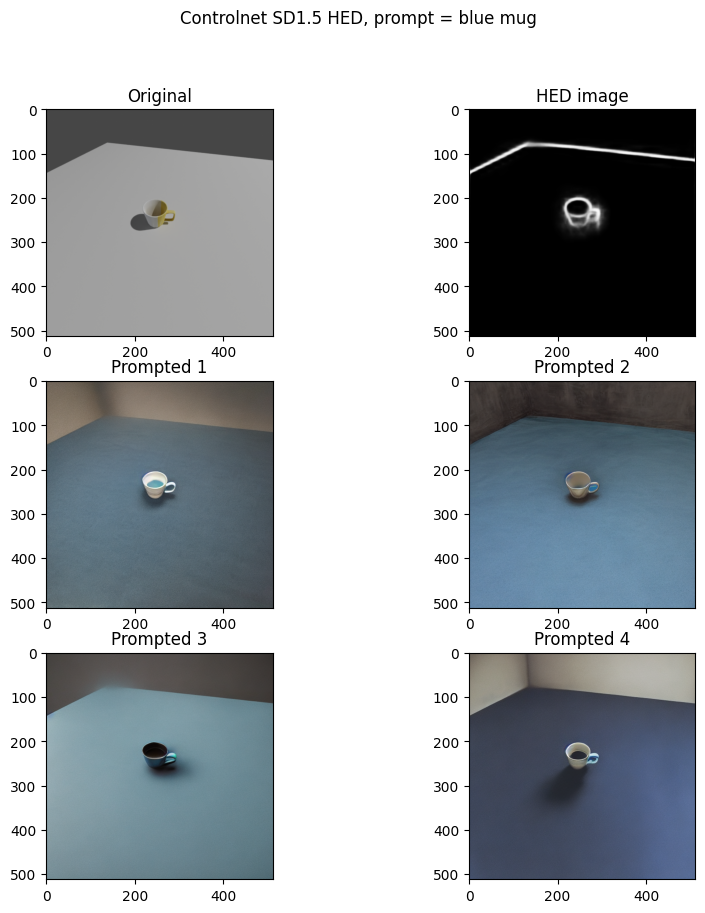

In [24]:
## show results next to the original image and the cannied image
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
# set the title
fig.suptitle(f"Controlnet SD1.5 HED, prompt = {prompt}")
axs[0, 0].imshow(rgb_image)
axs[0, 0].set_title("Original")
axs[0, 1].imshow(control_image)
axs[0, 1].set_title("HED image")
axs[1, 0].imshow(images[0])
axs[1, 0].set_title("Prompted 1")
axs[1, 1].imshow(images[1])
axs[1, 1].set_title("Prompted 2")
axs[2, 0].imshow(images[2])
axs[2, 0].set_title("Prompted 3")
axs[2, 1].imshow(images[3])
axs[2, 1].set_title("Prompted 4")